In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('delivery_time.csv')

In [7]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
df.shape

(21, 2)

In [8]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [11]:
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


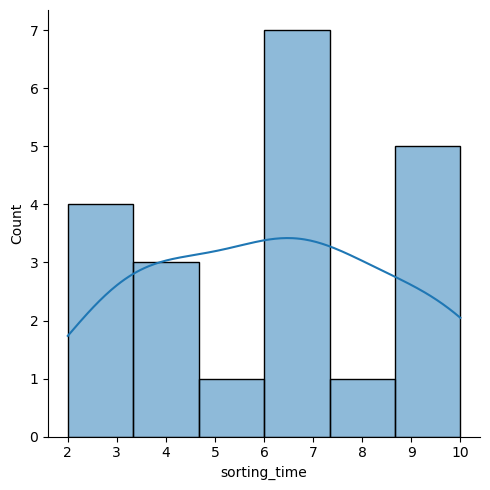

In [12]:
sns.displot(df['sorting_time'],kde=True)

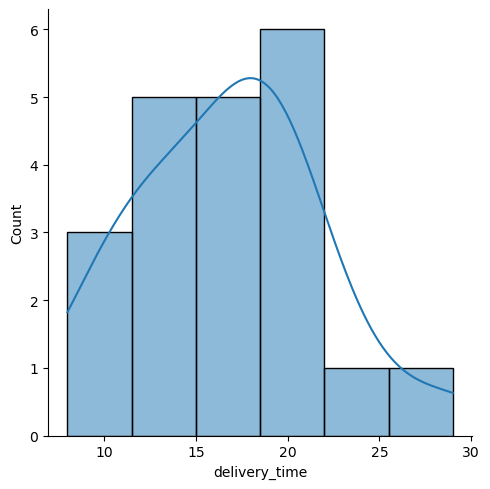

In [13]:
sns.displot(df['delivery_time'],kde=True)

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

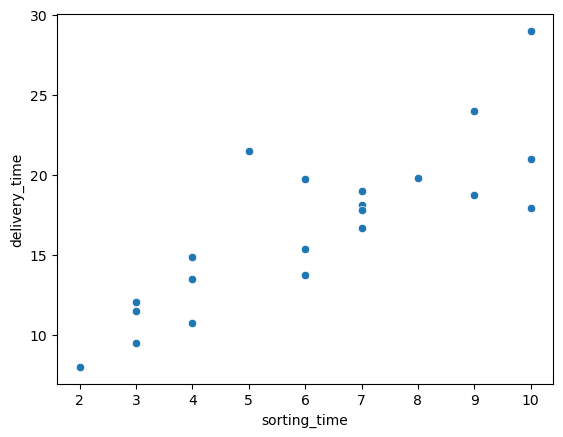

In [14]:
sns.scatterplot(x = df['sorting_time'], y = df['delivery_time'])

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

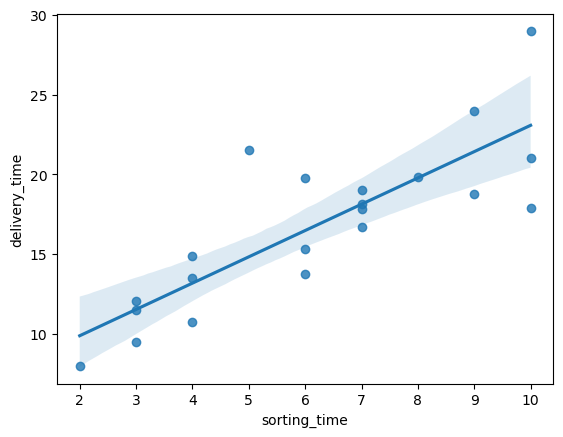

In [15]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

In [16]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [17]:
model = smf.ols('delivery_time ~ sorting_time', data = df).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        17:59:57   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [20]:
predicted_time = model.predict(df.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : df.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,23.072933
1,13.50,13.178814
2,19.75,16.476853
3,24.00,21.423913
4,29.00,23.072933
5,15.35,16.476853
6,19.00,18.125873
7,9.50,11.529794
8,17.90,23.072933
9,18.75,21.423913


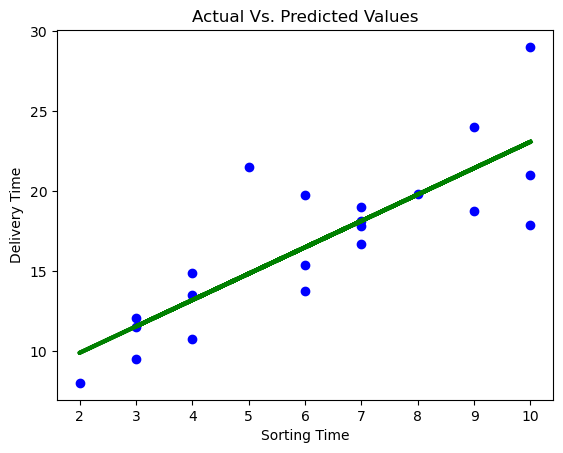

In [21]:
# Plotting Actual Vs. Predicted Values
plt.scatter(df.sorting_time, df.delivery_time,  color='blue')
plt.plot(df.sorting_time, predicted_time, color='green', linewidth=3)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [22]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(df.delivery_time,predicted_time))
print("Mean Squared Error",metrics.mean_squared_error(df.delivery_time,predicted_time))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(df.delivery_time,predicted_time)))
print("R^2 Score :            ", metrics.r2_score(df.delivery_time, predicted_time))

Mean Absolute Error 2.0857409551882653
Mean Squared Error 7.793311548584063
Root Mean Squared Error 2.7916503270617654
R^2 Score :             0.6822714748417231


p-value from the test: below 0.05 generally means non-normal: 0.1496009945346252
Residuals are normally distributed


C:\Users\HP\AppData\Local\Temp\ipykernel_13000\2067859606.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


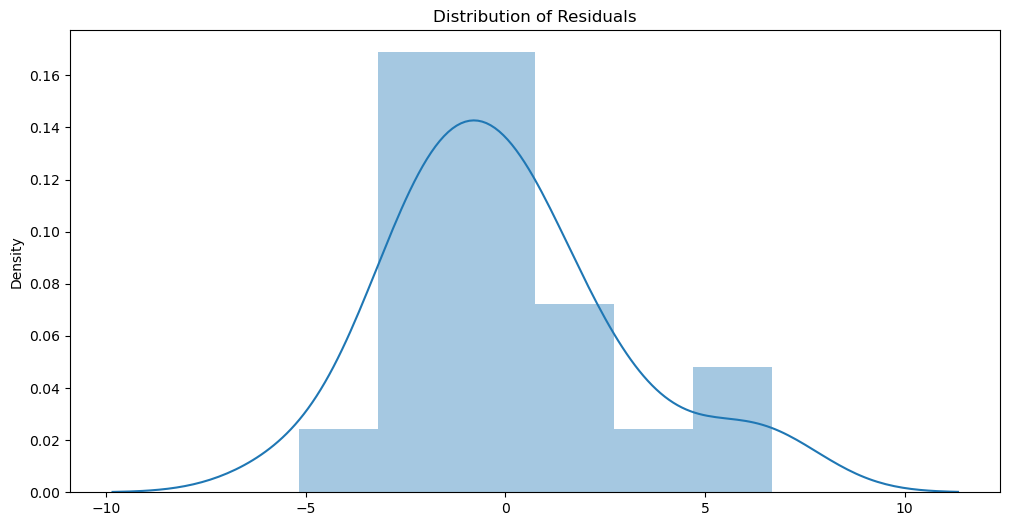

In [23]:
#Checking Normality of Residuals Using the Anderson-Darling test for normal distribution
from statsmodels.stats.diagnostic import normal_ad
residuals = df.delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()


In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        18:02:30   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#With Logarithmic Transformation
data=pd.DataFrame.copy(df)
data['log_sorting_time'] = np.log(df['sorting_time'])

In [26]:
data.head()

,delivery_time,sorting_time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


In [27]:
log_model = smf.ols('delivery_time ~ log_sorting_time', data = data).fit()

In [28]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           2.64e-06
Time:                        18:03:29   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
log_model.params

Intercept           1.159684
log_sorting_time    9.043413
dtype: float64

In [31]:
log_predicted_time = log_model.predict(data.log_sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data.delivery_time, 'Delivery_Time_Predicted' : log_predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,21.982913
1,13.50,13.696517
2,19.75,17.363305
3,24.00,21.030094
4,29.00,21.982913
5,15.35,17.363305
6,19.00,18.757354
7,9.50,11.094889
8,17.90,21.982913
9,18.75,21.030094


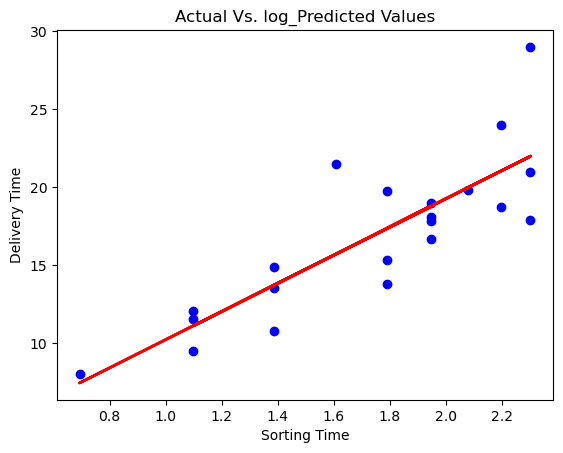

In [32]:
# Plotting Actual Vs.log Predicted Values
plt.scatter(data.log_sorting_time, data.delivery_time,  color='blue')
plt.plot(data.log_sorting_time, log_predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. log_Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [33]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(data.delivery_time,log_predicted_time))
print("Mean Squared Error",metrics.mean_squared_error(data.delivery_time,log_predicted_time))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(data.delivery_time,log_predicted_time)))
print("R^2 Score :            ", metrics.r2_score(data.delivery_time, log_predicted_time))

Mean Absolute Error 2.0473757067928995
Mean Squared Error 7.470226320948425
Root Mean Squared Error 2.733171476682066
R^2 Score :             0.6954434611324223


p-value from the test: below 0.05 generally means non-normal: 0.1496009945346252
Residuals are normally distributed


C:\Users\HP\AppData\Local\Temp\ipykernel_13000\670597190.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


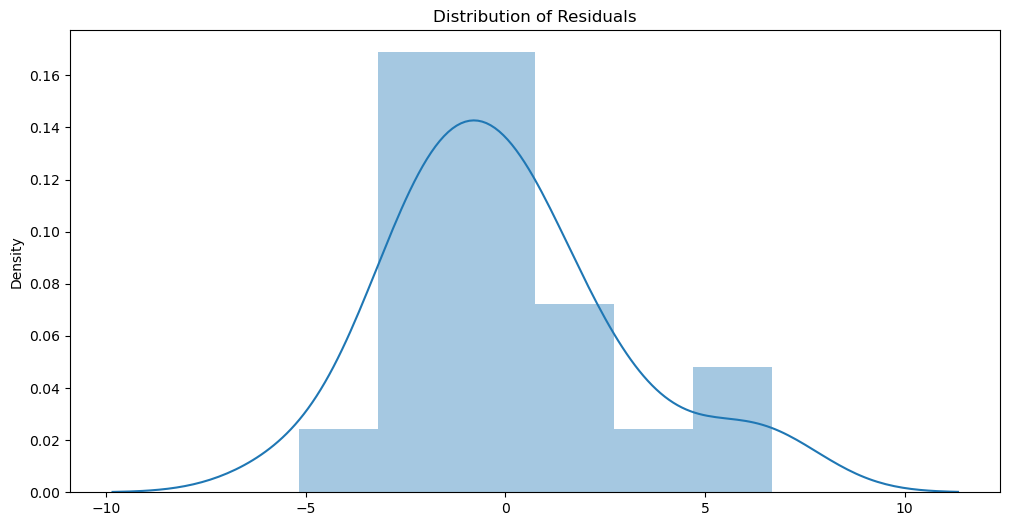

In [34]:
#Checking Normality of Residuals Using the Anderson-Darling test for normal distribution
from statsmodels.stats.diagnostic import normal_ad
residuals = df.delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [35]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           2.64e-06
Time:                        18:07:51   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Building model with Exponential Transformation


,delivery_time,sorting_time,log_sorting_time,log_delivery_time
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296


In [37]:
exp_model = smf.ols('log_delivery_time ~ sorting_time', data = data).fit()

In [38]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_delivery_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.59e-06
Time:                        18:08:44   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
exp_model.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [40]:
predicted_time = exp_model.predict(data.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data.log_delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,3.044522,3.176888
1,2.602690,2.543578
2,2.983153,2.754681
3,3.178054,3.071336
4,3.367296,3.176888
5,2.731115,2.754681
6,2.944439,2.860233
7,2.251292,2.438027
8,2.884801,3.176888
9,2.931194,3.071336


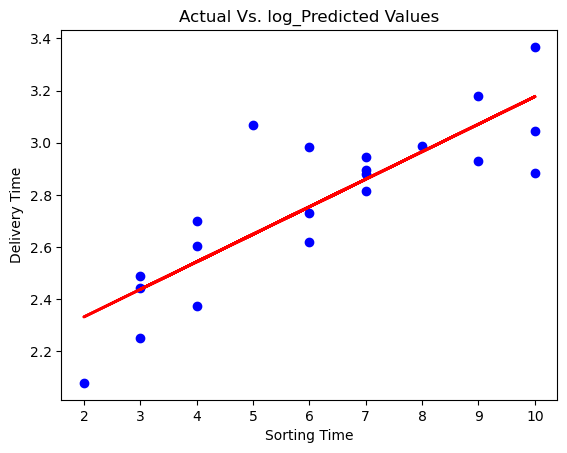

In [41]:
# Plotting Actual Vs.log Predicted Values
plt.scatter(data.sorting_time, data.log_delivery_time,  color='blue')
plt.plot(data.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. log_Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [42]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(data.log_delivery_time,predicted_time))
print("Mean Squared Error",metrics.mean_squared_error(data.log_delivery_time,predicted_time))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(data.log_delivery_time,predicted_time)))
print("R^2 Score :            ", metrics.r2_score(data.log_delivery_time, predicted_time))

Mean Absolute Error 0.1310730556090564
Mean Squared Error 0.027876563581789988
Root Mean Squared Error 0.16696276106302863
R^2 Score :             0.7109478980584187


In [ ]:
# pred_df = pd.DataFrame({'Actual': np.exp(data.log_delivery_time), 'Predicted': np.exp(predicted_time)})
pred_df

p-value from the test: below 0.05 generally means non-normal: 0.8006026322922348
Residuals are normally distributed


C:\Users\HP\AppData\Local\Temp\ipykernel_13000\1959535200.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


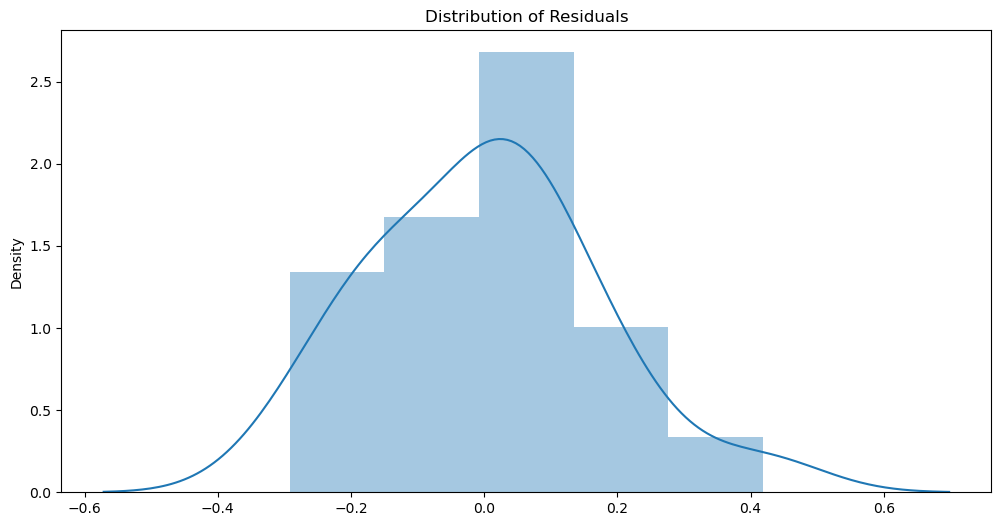

In [44]:
# Checking Normality of Residuals Using the Anderson-Darling test for normal distribution
from statsmodels.stats.diagnostic import normal_ad
residuals = data.log_delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [45]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_delivery_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.59e-06
Time:                        18:12:13   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""